In [31]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import entropy
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [32]:
df = pd.read_csv('../datasource/DatasetForML.csv')

In [33]:
X = df[[i for i in df.columns if i not in ['price', 'price_category']]]
y = df['price_category']

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [35]:
X_reduced = df[['curbweight', 'highwaympg', 'citympg']]

In [40]:
X_train_red, X_test_red, y_train_red, y_test_red = train_test_split(X_reduced, y, test_size = 0.2, random_state = 42)

In [44]:
modeloArbol = DecisionTreeClassifier(criterion = 'gini', max_depth = 3)  

modeloArbol.fit(X_train_red, y_train)

y_pred_red = modeloArbol.predict(X_test_red)

accuracy = accuracy_score(y_test_red, y_pred_red)
accuracy

0.975609756097561

In [52]:
from sklearn.model_selection import cross_val_score
import numpy as np 

accuracy_cv = cross_val_score(modeloArbol, X_test_red, y_test_red, scoring= 'accuracy', cv= 10, verbose= 2)

np.mean(accuracy_cv)

[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s


0.975

In [54]:
auc_cv = cross_val_score(modeloArbol, X_test_red, y_test_red, scoring= 'roc_auc', cv= 10, verbose= 2)

np.mean(auc_cv)

[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s


1.0

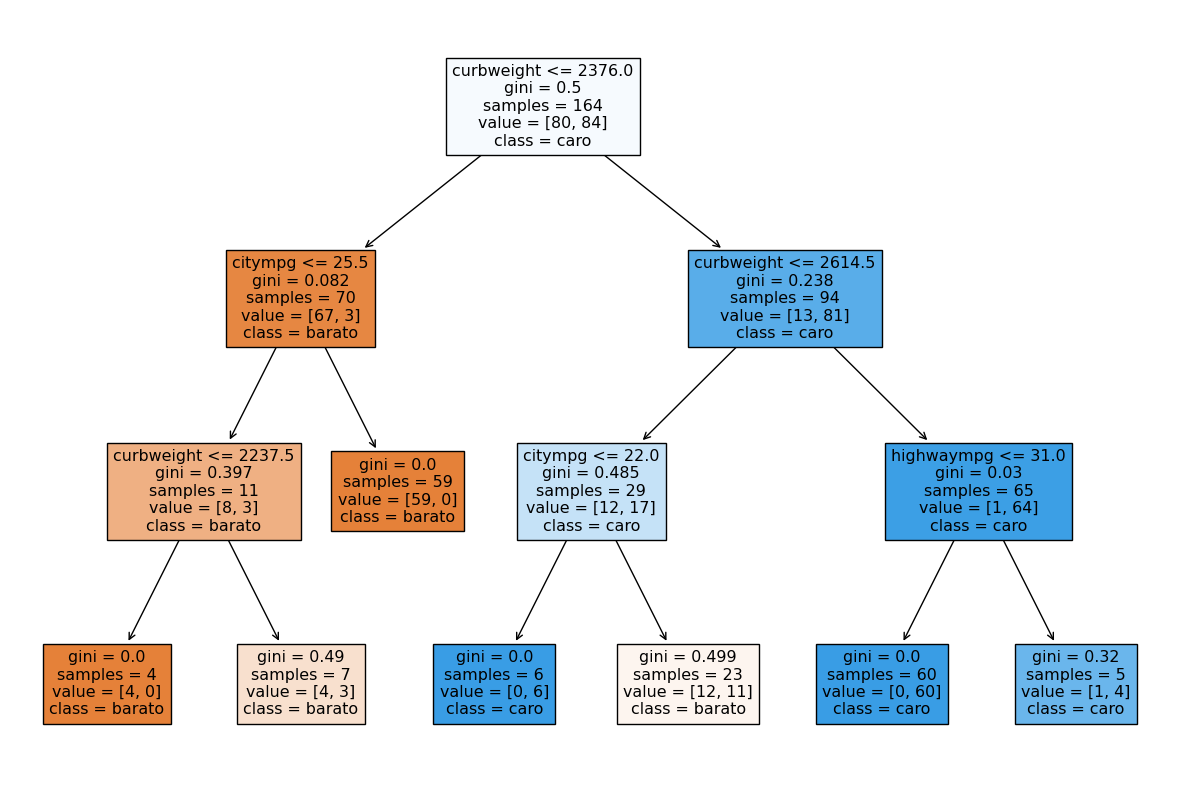

In [55]:
plt.figure(figsize=(15, 10))
plot_tree(modeloArbol, filled=True, feature_names=X_reduced.columns, class_names=['barato', 'caro'])
plt.show()

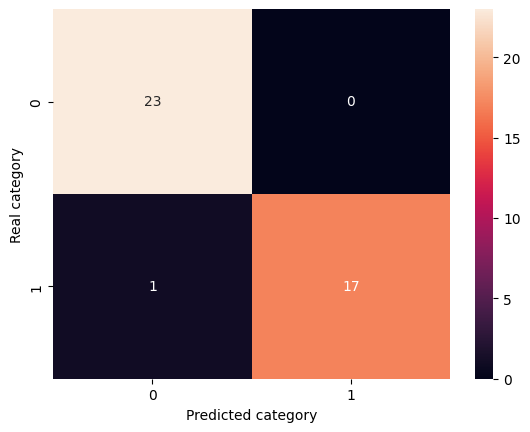

In [56]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

conf_matrix = confusion_matrix(y_test_red, y_pred_red)
sns.heatmap(data= conf_matrix, annot= True)
plt.xlabel('Predicted category')
plt.ylabel('Real category')
plt.show()

In [57]:
from sklearn.model_selection import GridSearchCV

model = DecisionTreeClassifier()

p_grid = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': [i for i in range(10)],
    'random_state': [42]
}

grid_search = GridSearchCV(model, p_grid, verbose=2)

In [58]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV] END .......criterion=gini, max_depth=0, random_state=42; total time=   0.0s
[CV] END .......criterion=gini, max_depth=0, random_state=42; total time=   0.0s
[CV] END .......criterion=gini, max_depth=0, random_state=42; total time=   0.0s
[CV] END .......criterion=gini, max_depth=0, random_state=42; total time=   0.0s
[CV] END .......criterion=gini, max_depth=0, random_state=42; total time=   0.0s
[CV] END .......criterion=gini, max_depth=1, random_state=42; total time=   0.0s
[CV] END .......criterion=gini, max_depth=1, random_state=42; total time=   0.0s
[CV] END .......criterion=gini, max_depth=1, random_state=42; total time=   0.0s
[CV] END .......criterion=gini, max_depth=1, random_state=42; total time=   0.0s
[CV] END .......criterion=gini, max_depth=1, random_state=42; total time=   0.0s
[CV] END .......criterion=gini, max_depth=2, random_state=42; total time=   0.0s
[CV] END .......criterion=gini, max_depth=2, ra

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'random_state': [42]},
             verbose=2)

In [59]:
grid_search.best_score_

0.9327651515151516

In [60]:
grid_search.best_params_

{'criterion': 'gini', 'max_depth': 7, 'random_state': 42}

In [61]:
best_model = grid_search.best_estimator_

In [62]:
y_pred_grid = best_model.predict(X_test)

In [63]:
accuracy_score(y_test, y_pred_grid)

0.9512195121951219

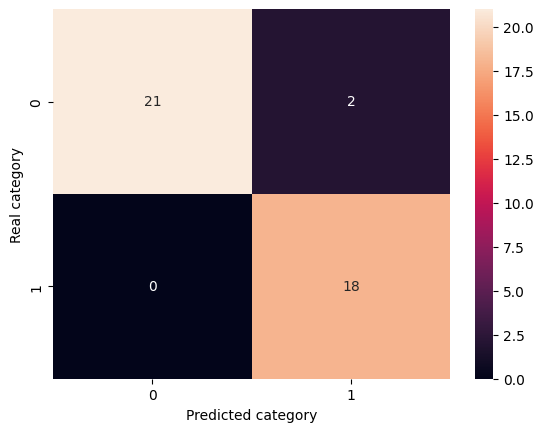

In [64]:
conf_matrix = confusion_matrix(y_test, y_pred_grid)
sns.heatmap(data= conf_matrix, annot= True)
plt.xlabel('Predicted category')
plt.ylabel('Real category')
plt.show()